The fireworks.ipynb should run first to generate database of DFT calculations.

Here is an example for reading data and generate band structure images from fireworks.

/home/ljcj007/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/electronic_structure/plotter.py:2295: UserWarning:

Cannot get element projected data; either the projection data doesn't exist, or you don't have a compound with exactly 2 or 3 or 4 unique elements.



<module 'matplotlib.pyplot' from '/opt/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

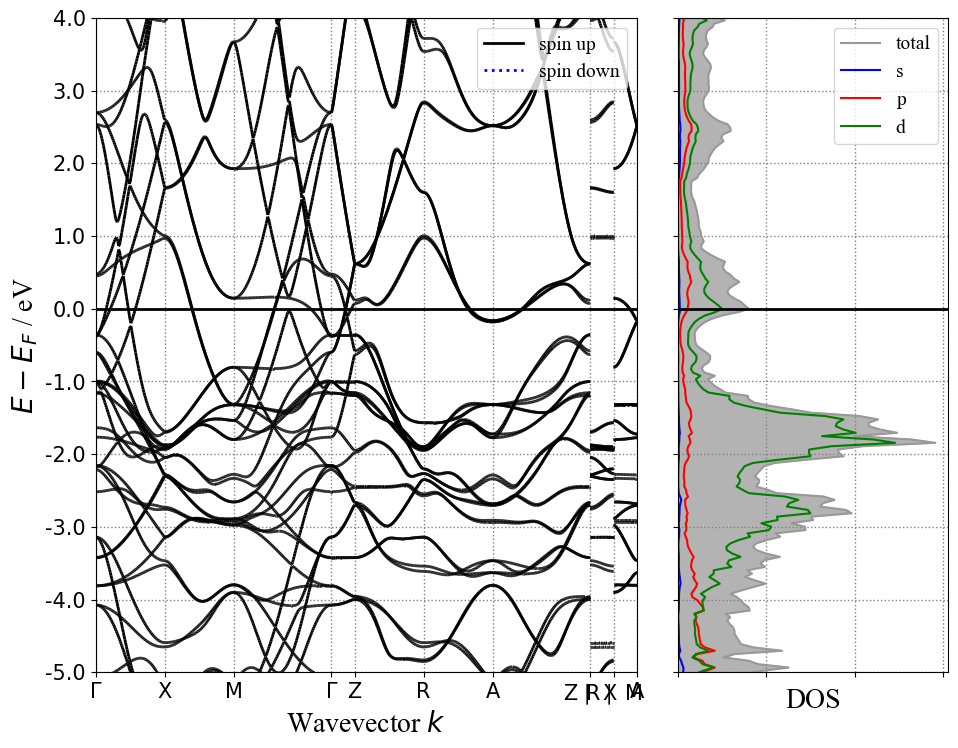

In [3]:
from atomate.vasp.database import VaspCalcDb
from pymatgen.electronic_structure.plotter import BSDOSPlotter

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = 'db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

uniform_bs_entry = atomate_db.collection.find_one({'task_label': 'nscf uniform','formula_pretty': 'TbYNi4(B2C)2'})
complete_dos = atomate_db.get_dos(uniform_bs_entry['task_id'])

line_bs_entry = atomate_db.collection.find_one({'task_label': 'nscf line', 'formula_pretty': 'TbYNi4(B2C)2'})
bandstructure = atomate_db.get_band_structure(line_bs_entry['task_id'])

plt_1=BSDOSPlotter(bs_projection='elements', dos_projection='orbitals',vb_energy_range=5, fixed_cb_energy=5)
plt_1.get_plot(bs=bandstructure,dos=complete_dos)

Noted that same materials have no bands crossing Fermi level, thus have no Fermi surface images.

The gernerated hdf5 file could be download from https://www.scidb.cn/en/file?id=c2487ff51a6230ba2ff55f0b5a8bfe8f

In [4]:
import sys
import io
import matplotlib.pyplot as plt
from write_superbands import write_superbands_atomate
from pymatgen.core import Structure
import openpyxl
import h5py  
original_stdout = sys.stdout
h5pyfn='0724.hdf5'
fn='./cif/'
h5py.File(h5pyfn, 'w')
workbook = openpyxl.load_workbook('SuperBand.xlsx')	# 返回一个workbook数据类型的值
sheet = workbook['Sheet1']  # 获取指定sheet表
for i in range (2,len(sheet["A"])+1):
    if not sheet["B"+str(i)].value == sheet["G"+str(i)].value:
        continue
    name=str(sheet["G"+str(i)].value)+'.cif'
    try:
        structure=Structure.from_file(fn+name)
        formula=structure.composition.reduced_formula
        Tc=sheet["C"+str(i)].value
        sys.stdout = io.StringIO()
        write_superbands_atomate(h5pyfn,formula,formula,Tc)
        sys.stdout = original_stdout
        print(formula,'pass')
        plt.close("all")
    except:
        print(formula,'fall')
        continue
    

/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/electronic_structure/plotter.py:2295: UserWarning:

Cannot get element projected data; either the projection data doesn't exist, or you don't have a compound with exactly 2 or 3 or 4 unique elements.



BaNdMnCoO5 pass
Ba2YAg3O8 pass


/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning:

The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.

/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/plot.py:843: UserWarning:

Structure does not match expected primitive cell

/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning:

The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.

/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/plot.py:186: UserWarning:

Structure does not match expected primitive cell



YCr2O4 pass


/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/slice.py:161: UserWarning:

Ioslines have different property dimensions, using the largest.



BaAgO2 pass
PrCoSb2 pass
NdCoSb2 pass
LaCoSb2 pass


/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning:

The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.

/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/plot.py:843: UserWarning:

Structure does not match expected primitive cell

/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning:

The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.

/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/plot.py:186: UserWarning:

Structure does not match expected primitive cell



BaNd2Mn2O7 pass


/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/slice.py:161: UserWarning:

Ioslines have different property dimensions, using the largest.



BaAuO2 pass


/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/slice.py:161: UserWarning:

Ioslines have different property dimensions, using the largest.



Ba2AlCr3O8 pass


/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1168: UserWarning:

Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.

/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning:

The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.

/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/plot.py:843: UserWarning:

Structure does not match expected primitive cell

/home/ljcj007/.local/lib/python3.8/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning:

The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.

/home/ljcj007/.local/lib/python3.8/site-packages/ifermi/plot.py:186: UserWarning:

Structure does not match expected primitive cell



SrLa2Mn3O9 pass
